##Profiling

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')

np.random.seed(1234)

data =pd.read_csv("/content/drive/MyDrive/Feynn_Labs_Intership/McDonalds Case Study-20250216T064609Z-001/McDonalds Case Study/mcdonalds.csv")


df = pd.DataFrame(data)
df.head(5)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [13]:
print(pd.isnull(data).sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1453.0,44.604955,14.221178,18.0,33.0,45.0,57.0,71.0


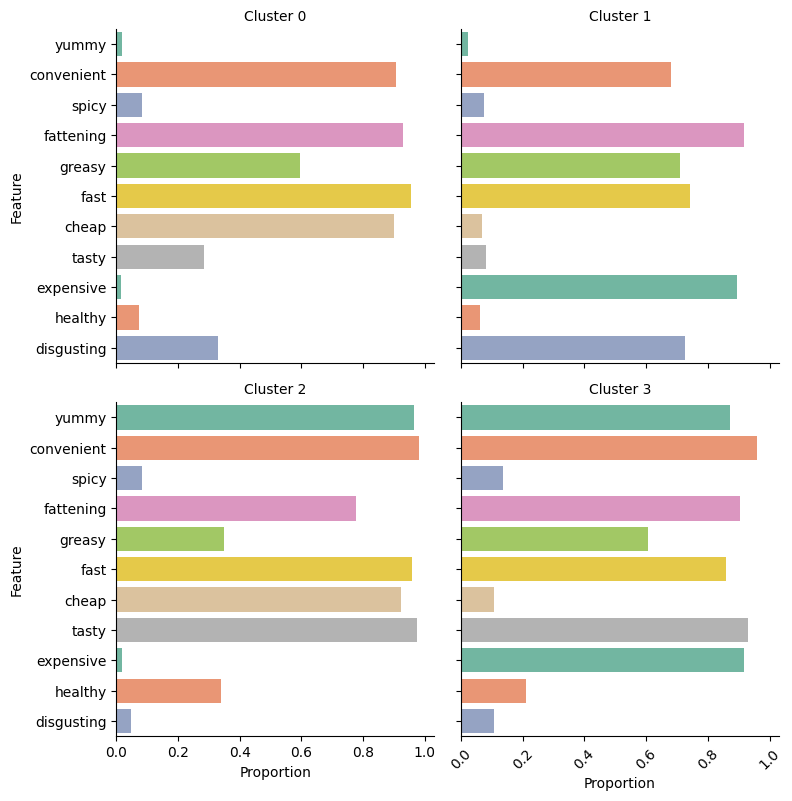

In [18]:
MD_x = data.iloc[:, :11].applymap(lambda x: 1 if x == "Yes" else 0)

kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10)
MD_x['Cluster'] = kmeans.fit_predict(MD_x)

relevant_columns = data.columns[:11]
cluster_means = MD_x.groupby("Cluster")[relevant_columns].mean()

cluster_melted = cluster_means.reset_index().melt(id_vars="Cluster", var_name="Feature", value_name="Proportion")
g = sns.FacetGrid(cluster_melted, col="Cluster", col_wrap=2, sharex=True, sharey=True, height=4)
g.map_dataframe(sns.barplot, x="Proportion", y="Feature", palette="Set2")

g.set_axis_labels("Proportion", "Feature")
g.set_titles("Cluster {col_name}")

plt.xticks(rotation=45)
plt.show()

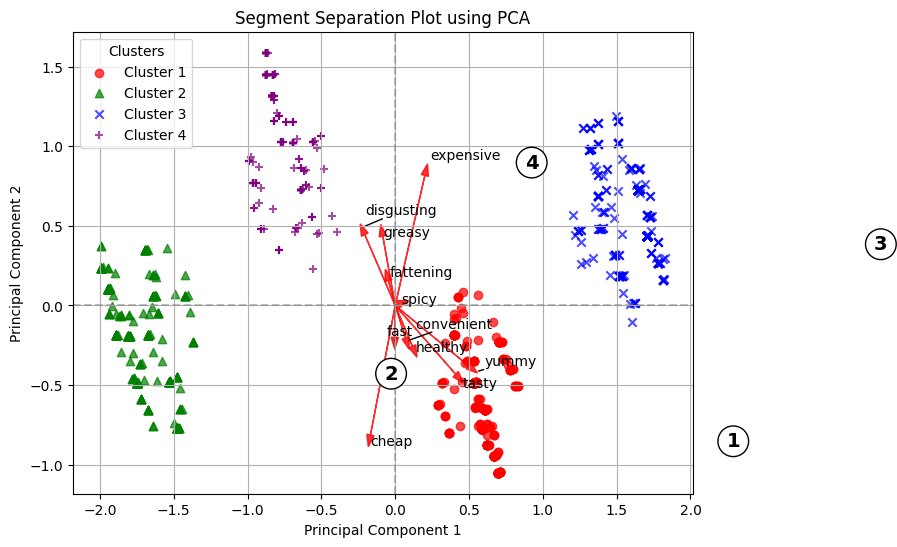

In [24]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from adjustText import adjust_text


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from adjustText import adjust_text

np.random.seed(1234)
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10)
clusters = kmeans.fit_predict(MD_x)

pca_df = pd.DataFrame(MD_pca, columns=["PC1", "PC2"])
pca_df["Cluster"] = clusters

markers = ["o", "^", "x", "+"]
colors = ["red", "green", "blue", "purple"]

plt.figure(figsize=(8, 6))
for cluster, marker, color in zip(range(4), markers, colors):
    subset = pca_df[pca_df["Cluster"] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], marker=marker, color=color, label=f"Cluster {cluster+1}", alpha=0.7)

components = pca.components_.T * 1.5
texts = []

for i, feature in enumerate(data.columns[:11]):
    plt.arrow(0, 0, components[i, 0], components[i, 1], color='red', alpha=0.8, head_width=0.05)
    text = plt.text(components[i, 0] * 1.1, components[i, 1] * 1.1, feature, color='black', fontsize=10)
    texts.append(text)
adjust_text(texts, arrowprops=dict(arrowstyle="-", color="black"))

cluster_centers = kmeans.cluster_centers_ @ pca.components_.T
for i, (x, y) in enumerate(cluster_centers):
    plt.text(x, y, str(i + 1), color="black", fontsize=14, fontweight="bold",
             bbox=dict(facecolor="white", edgecolor="black", boxstyle="circle"))

plt.axhline(0, linestyle="--", color="gray", alpha=0.5)
plt.axvline(0, linestyle="--", color="gray", alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Segment Separation Plot using PCA")
plt.grid()
plt.legend(title="Clusters")
plt.show()


In [22]:
pip install adjustText

##Describing


<Figure size 800x600 with 0 Axes>

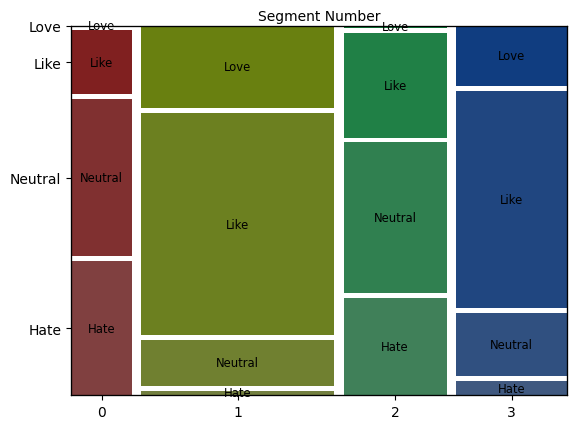

In [25]:
from sklearn.cluster import KMeans
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/content/drive/MyDrive/Feynn_Labs_Intership/McDonalds Case Study-20250216T064609Z-001/McDonalds Case Study/mcdonalds.csv")
MD_x = df.iloc[:, :11].applymap(lambda x: 1 if x == "Yes" else 0)


kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(MD_x)

df["Like"] = pd.to_numeric(df["Like"], errors="coerce")
df["Like_Category"] = pd.cut(df["Like"], bins=[-6, -3, 0, 3, 6], labels=["Hate", "Neutral", "Like", "Love"])
contingency_table = pd.crosstab(df["Cluster"], df["Like_Category"])

plt.figure(figsize=(8, 6))
mosaic(contingency_table.stack(), gap=0.02, title="", labelizer=lambda k: f"{k[1]}")
plt.xlabel("Segment Number")
plt.ylabel("Like Ratings")
plt.show()

##Exploring

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

(1453, 15)

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once 

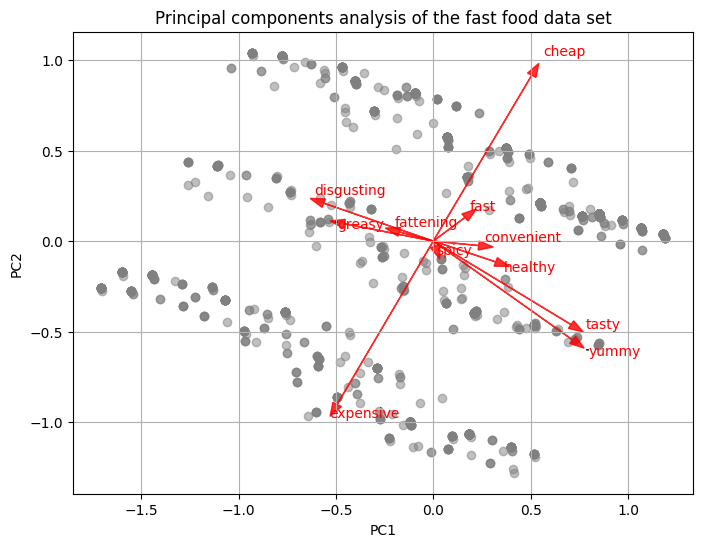

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from adjustText import adjust_text

df = pd.read_csv("/content/drive/MyDrive/Feynn_Labs_Intership/McDonalds Case Study-20250216T064609Z-001/McDonalds Case Study/mcdonalds.csv")

print(df.columns)
print()
print(df.shape)
print()
print(df.head())
print()


MD = np.array(df.iloc[:,:11].values)
MD = np.where(MD == "Yes",1,0)
Mean = np.round(MD.mean(axis=0), 2)
colMeans = pd.Series(Mean, index = df.columns[:11])
print(colMeans)

pca = PCA()
MD_pca =pca.fit_transform(MD)
sd = np.sqrt(pca.explained_variance_)
prop_var = pca.explained_variance_ratio_
cum_var = np.cumsum(prop_var)
d ={
    "Standard Deviation": np.round(sd, 4),
    "Proportion of Variance": np.round(prop_var, 4),
    "Cumulative Proportion": np.round(cum_var, 4)
}
components = [f"PC{i+1}" for i in range(len(prop_var))]
summary = pd.DataFrame(d, index=components)

print(summary)

std = np.round(np.sqrt(pca.explained_variance_),1)
print("Standard deviations (1, ..., p={})".format(len(prop_var)))
print(std)
rotation = np.round(pca.components_.T,3)
rotation_df = pd.DataFrame(rotation,
                           index = df.columns[:11],
                           columns = components)
print(rotation_df)

components = pca.components_.T
scale = 1.5
scaled_components = components * scale
plt.figure(figsize=(8,6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color="grey", alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Principal components analysis of the fast food data set")

texts=[]
mean = np.mean(MD,axis=0)
for i, feature in enumerate(df.columns[:11]):
    plt.arrow(0, 0, scaled_components[i, 0], scaled_components[i, 1], color='red', alpha=0.8, head_width=0.05)
    text = plt.text(scaled_components[i, 0] * 1.1, scaled_components[i, 1] * 1.1, feature, color='red', fontsize=10)
    texts.append(text)

adjust_text(texts, arrowprops=dict(arrowstyle="-", color="black"))


plt.grid()
plt.show()


In [ ]:
##Selecting_target

Cluster
0    2.679167
1    2.584483
2    2.809061
3    2.540123
Name: VisitFrequency, dtype: float64

Cluster
0    0.420833
1    0.601724
2    0.592233
3    0.478395
Name: Female, dtype: float64

Cluster
0    0.061086
1   -0.006905
2   -0.020895
3   -0.069763
Name: Like, dtype: float64



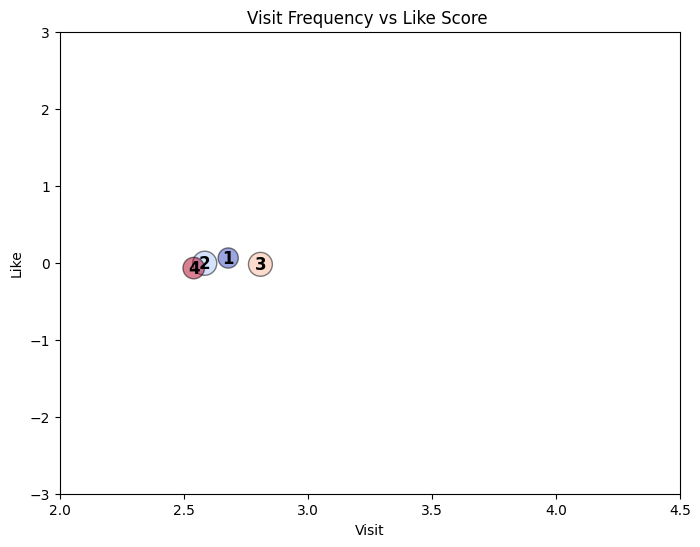

In [27]:
df = pd.read_csv("/content/drive/MyDrive/Feynn_Labs_Intership/McDonalds Case Study-20250216T064609Z-001/McDonalds Case Study/mcdonalds.csv")
MD_x = df.iloc[:, :11].applymap(lambda x: 1 if x.strip().lower() == "yes" else 0)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
k4 = kmeans.fit_predict(MD_x)

df["Cluster"] = k4
df["VisitFrequency"] = LabelEncoder().fit_transform(df["VisitFrequency"])
visit_mean = df.groupby("Cluster")["VisitFrequency"].mean()
print(visit_mean)
print()
df["Female"] = (df["Gender"] == "Female").astype(int)
female_mean = df.groupby("Cluster")["Female"].mean()
print(female_mean)
print()
df["Like"] = np.random.uniform(-3, 3, size=len(df))
like_mean = df.groupby("Cluster")["Like"].mean()
print(like_mean)
print()

plt.figure(figsize=(8, 6))
bubble_size = 500 * female_mean
plt.scatter(visit_mean, like_mean, s=bubble_size, alpha=0.5, c=range(4), cmap="coolwarm", edgecolors="k")
for i, (x, y) in enumerate(zip(visit_mean, like_mean)):
    plt.text(x, y, str(i + 1), fontsize=12, ha="center", va="center", weight="bold")

plt.xlim(2, 4.5)
plt.ylim(-3, 3)
plt.xlabel("Visit")
plt.ylabel("Like")
plt.title("Visit Frequency vs Like Score ")
plt.show()